In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro


In [20]:
df = pd.read_csv('filmes_filtrados.csv')

In [21]:
# Convert the 'genres' column to a list of genres
df['genre_names'] = df['genres'].apply(lambda x: x.split())

In [22]:
#display(df[["id", "title", "genre_names"]])

In [23]:
# Explode os gêneros para análises individuais
df_exploded = df.explode('genre_names')

In [24]:
#display(df_exploded.head())

In [25]:
# Calcula a média das notas por gênero
media_por_genero = df_exploded.groupby('genre_names')['vote_average'].mean()

C:\Users\iahuu\AppData\Local\Temp\ipykernel_13772\930335665.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media.values, y=media.index, palette=colors)


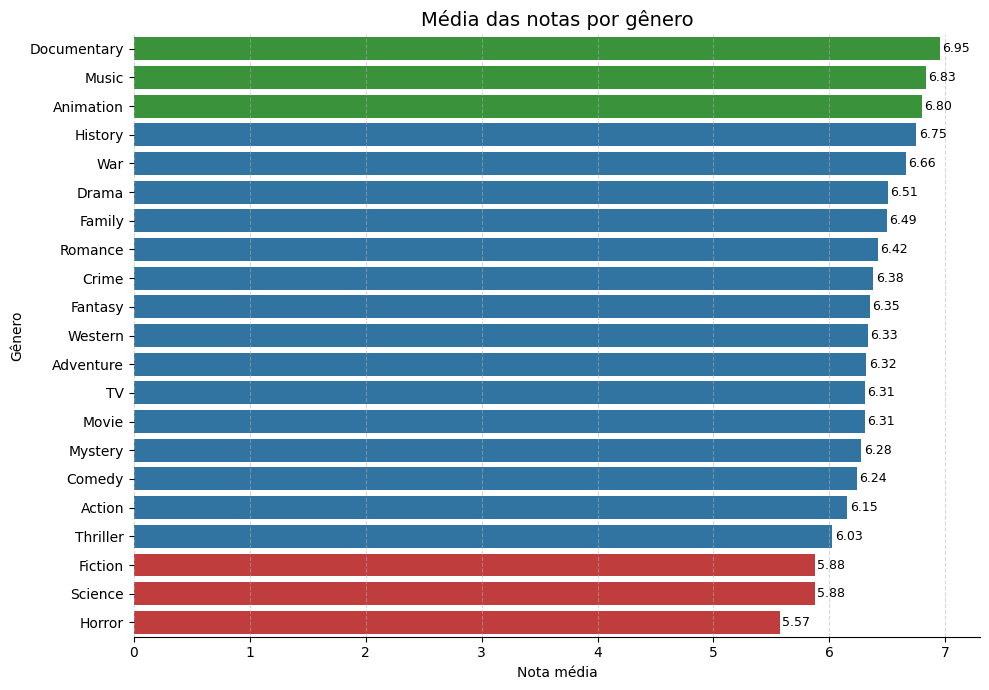

In [26]:
# Ordenar do maior para o menor
media = media_por_genero.sort_values(ascending=False)

# Top 3 e bottom 3 (com base na ordem original)
top_3 = media.head(3).index
bottom_3 = media.tail(3).index

# Lista de cores
colors = [
    '#2ca02c' if g in top_3 else '#d62728' if g in bottom_3 else '#1f77b4'
    for g in media.index
]

# Plot
plt.figure(figsize=(10, 7))
sns.barplot(x=media.values, y=media.index, palette=colors)

# Adiciona as notas ao lado das barras
for i, v in enumerate(media.values):
    plt.text(v + 0.02, i, f"{v:.2f}", va="center", fontsize=9)

# Estética
plt.title('Média das notas por gênero', fontsize=14)
plt.xlabel('Nota média')
plt.ylabel('Gênero')
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()


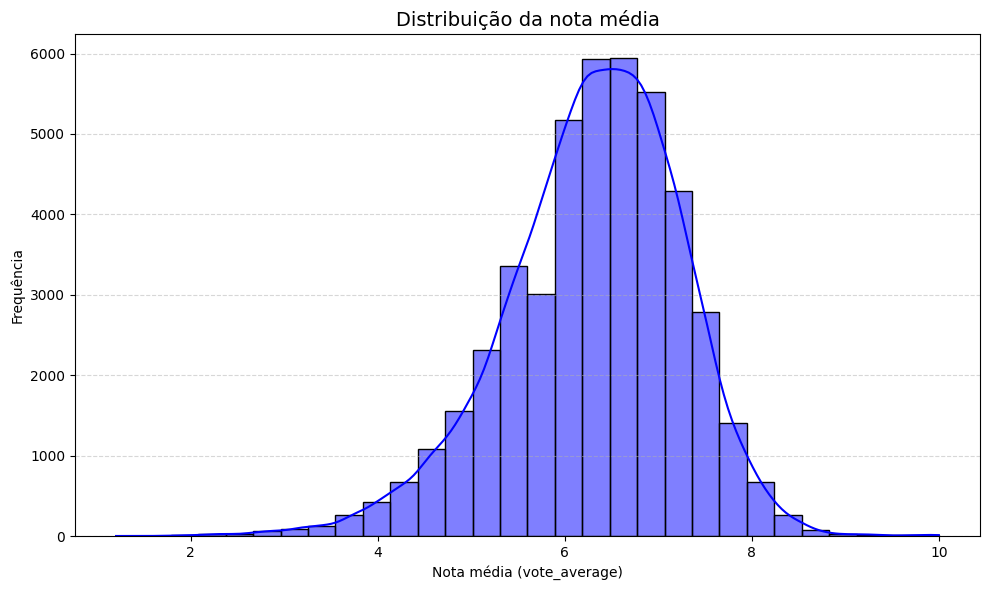

Estatística do teste: 0.9844, p-valor: 0.0000
As notas dos filmes não seguem uma distribuição normal (rejeitamos H0).


c:\Users\iahuu\Documents\GitHub\projeto-pisi3\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45142.
  res = hypotest_fun_out(*samples, **kwds)


In [27]:
# Histograma e gráfico de densidade
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], kde=True, bins=30, color='blue')
plt.title('Distribuição da nota média', fontsize=14)
plt.xlabel('Nota média (vote_average)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Teste de normalidade Shapiro-Wilk
stat, p = shapiro(df['vote_average'])
print(f"Estatística do teste: {stat:.4f}, p-valor: {p:.4f}")

# Interpretação do p-valor
if p > 0.05:
    print("As notas dos filmes seguem uma distribuição normal (não rejeitamos H0).")
else:
    print("As notas dos filmes não seguem uma distribuição normal (rejeitamos H0).")

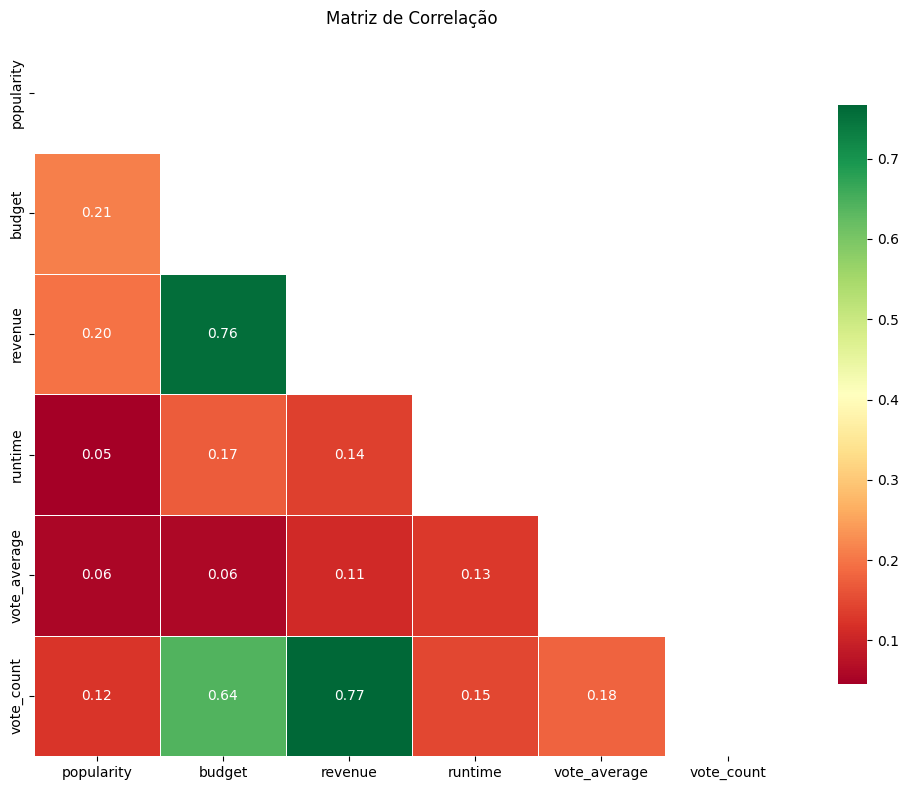

In [28]:
# Calcula a correlação
# Remove colunas indesejadas como 'index' e 'id', se existirem
df_corr = df.drop(columns=['index', 'id'], errors='ignore')

# Calcula a matriz de correlação apenas com colunas numéricas
correlacao = df_corr.corr(numeric_only=True)
# Cria a máscara para a parte superior
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Tamanho da figura
plt.figure(figsize=(10, 8))

# Heatmap
sns.heatmap(
    correlacao,
    mask=mask,
    cmap='RdYlGn',  # Mapa de cores vermelho → amarelo → verde
    annot=True,
    fmt=".2f",
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()